In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import os

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'classification.ipynb',
 'DataCleaning.ipynb',
 'Dataset',
 'dict_data.pkl',
 'New folder',
 'opencv_harr',
 'rename_script.py',
 'test_images',
 'ttt',
 'X_feature.npy',
 'y_feature.pkl']

In [5]:
'''
    read image from child folder of current 
    directory
'''
img = cv2.imread('./test_images/messi2.jpg')
img.shape, img.ndim

((703, 959, 3), 3)

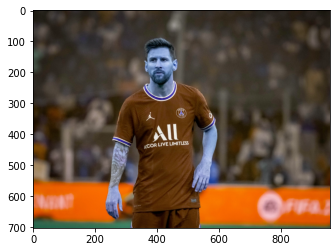

In [6]:
plt.imshow(img)

In [7]:
'''
    convert image to greyscale
'''
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray scale image is 2d array
gray.shape, gray.ndim
# now the third dimension of channels have been removed

((703, 959), 2)

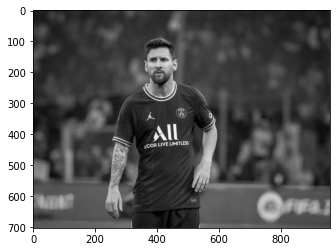

In [8]:
# plotting gray scale image
plt.imshow(gray, cmap='gray')

In [9]:
'''
    Now we are detecting face and eyes through pretrained model
    in opencv called harrcascade
    
    return type ->
    face cascade return 2d array where each array
    contains 4 elements
    x_axis, y_axis, width, height
'''

face_cascade = cv2.CascadeClassifier('./opencv_harr/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv_harr/haarcascades/haarcascade_eye.xml')
face = face_cascade.detectMultiScale(gray, 1.3, 5)
face

array([[355, 122, 102, 102]], dtype=int32)

In [10]:
(x, y, w, h) = face[0]
x, y, w, h

(355, 122, 102, 102)

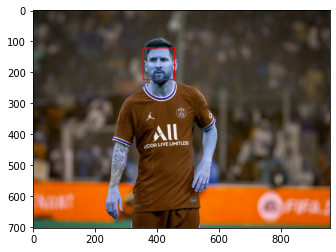

In [11]:
'''
    highlight face using cv2.rectangle
    @param1  image
    @param2 (x, y) -> start of image
    @param3 (w, h)
    @param4 (r, g, b) -> color code
    @param5 ->thickness of rectangle
'''
cv2.destroyAllWindows()
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

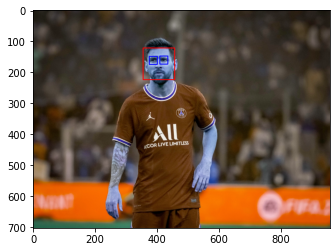

In [12]:
'''
    plot rectangle along face and eyes at once
'''
cv2.destroyAllWindows()
for (x, y, w, h) in face:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#     [rows,  cols] ->rowwise height and cols width
    face_region_gray = gray[y : y+h, x : x+w]
    face_region_color = face_img[y : y+h, x : x+w]
#     it will return eyes position
    eyes = eye_cascade.detectMultiScale(face_region_gray)
    
    for (e_X, e_Y, e_W, e_H) in eyes:
        cv2.rectangle(face_region_color, (e_X, e_Y), (e_X+e_W, e_Y+e_H),(0,0,255),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


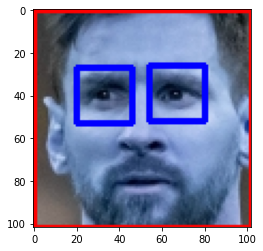

In [13]:
'''
    show image inside red rectangle
'''
cv2.destroyAllWindows()
plt.imshow(face_region_color, cmap='gray')

In [14]:
'''
    function to get cropped image back 
'''
def getCroppedImage(imagePath):
    image = cv2.imread(imagePath)
    if image is not None:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces_arr = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces_arr:
            face_gray = gray[y : y+h, x: x+w]
            face_color = image[y : y+h, x: x+w]
            eyes_arr = eye_cascade.detectMultiScale(face_gray)
    #         if more than 2 eyes are there than only return
            if(len(eyes_arr) >= 2):
                return face_color

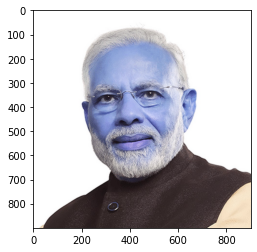

In [16]:
original_img = cv2.imread('./Dataset/modiji/modiji1.jpg')
plt.imshow(original_img)

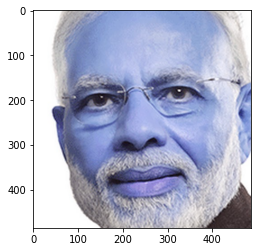

In [18]:
croppedImage = getCroppedImage('./Dataset/modiji/modiji1.jpg')
plt.imshow(croppedImage)

None


(None, <matplotlib.image.AxesImage at 0x1d655151490>)

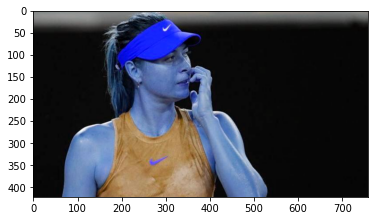

In [23]:
# it will not give output as 2 eyes are not clearly visible
eye_not_visible = getCroppedImage('./test_images/maria26.jpg')
print(eye_not_visible),plt.imshow(cv2.imread('./test_images/maria26.jpg'))

In [24]:
# path to dataset folder
datasetPath = './Dataset/'
croppedFolderPath = './Dataset/cropped/'

In [25]:
imgFolders = []
for entry in os.scandir(datasetPath):
    if entry.is_dir():
        imgFolders.append(entry.path)

In [26]:
imgFolders

['./Dataset/abdul_kalam',
 './Dataset/cropped',
 './Dataset/maria',
 './Dataset/messi',
 './Dataset/modiji',
 './Dataset/MsDhoni',
 './Dataset/roger']

In [27]:
import shutil
# if croppedFolder exist first delete then create
if os.path.exists(croppedFolderPath):
    shutil.rmtree(croppedFolderPath)
    
os.mkdir(croppedFolderPath)


In [28]:
'''
    Generate images inside cropped folder
    with respective folder name
'''
cropImageFolder = []
celebrityFileNamesDict = {}

# traverse through image folders
for imgFolder in imgFolders:
    count = 1
#     split folder name using '/' 
#     and take last element of array which is name 
    celebrityName = imgFolder.split('/')[-1]
    print(celebrityName)
    
#     map celebrity name with array 
#     we can use it to insert images inside single folder
    celebrityFileNamesDict[celebrityName] = []
    
    for entry in os.scandir(imgFolder):
        face_color = getCroppedImage(entry.path)
        if face_color is not None:
            croppedFolder = croppedFolderPath + celebrityName
            if not os.path.exists(croppedFolder):
                os.makedirs(croppedFolder)
#                 print(face)
                cropImageFolder.append(croppedFolder)
                print("Generating cropped images in folder: ", croppedFolder)
                
            croppedFileName = celebrityName + str(count) + ".png"
            croppedFilePath = croppedFolder + "/" + croppedFileName 
            cv2.imwrite(croppedFilePath, face_color)
            celebrityFileNamesDict[celebrityName].append(croppedFilePath)
            count += 1    

abdul_kalam
Generating cropped images in folder:  ./Dataset/cropped/abdul_kalam
cropped
maria
Generating cropped images in folder:  ./Dataset/cropped/maria
messi
Generating cropped images in folder:  ./Dataset/cropped/messi
modiji
Generating cropped images in folder:  ./Dataset/cropped/modiji
MsDhoni
Generating cropped images in folder:  ./Dataset/cropped/MsDhoni
roger
Generating cropped images in folder:  ./Dataset/cropped/roger


**After above step we have created images and now we have to manually delete the obstructed images**

<h2 style='color:red'>Feature extraction using pywavelet transform </h2>

In [29]:
import pywt

def wavelet_transform(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

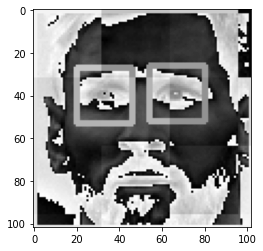

In [30]:
waveLet = wavelet_transform(face_region_color, 'db1', 5) 
plt.imshow(waveLet, cmap='gray')

In [32]:
'''
    Now we will check the celebrity dictionary 
    it contains celebrity name:-> list of images with path
'''
celebrityFileNamesDict

### Data Augumentation

In [33]:
def flip_img(image, flag):
#     horizontal flip
    if flag:
        return cv2.flip(image, 1)
#     vertical flip
    else:
        return cv2.flip(image, 0)

In [34]:
DIR = './Dataset/cropped/'
imagesPath = []

for child in os.scandir(DIR):
    imagesPath.append(child.path +'/')
    


# imagesPath
for folder in imagesPath:
    cnt = 99
    for img in os.scandir(folder):
#         print(img.path)
        img = cv2.imread(img.path)
        if img is not None:
            vertical_flip = flip_img(img, 0)
            horizontal_flip = flip_img(img, 1)
    #             print(folder)
            cv2.imwrite(folder + str(cnt)+'.png', vertical_flip)
            cnt += 1
            cv2.imwrite(folder + str(cnt)+ '.png', horizontal_flip)
            cnt += 1
        
imagesPath 

['./Dataset/cropped/abdul_kalam/',
 './Dataset/cropped/maria/',
 './Dataset/cropped/messi/',
 './Dataset/cropped/modiji/',
 './Dataset/cropped/MsDhoni/',
 './Dataset/cropped/roger/']

In [ ]:
dict_file = open("dict_data.pkl", "rb")
new_d = pickle.load(dict_file)
new_d

### Rename all files using rename script

In [55]:
# add augumented images to celebrity File Names Dictionary
li = []
for folder in imagesPath:
    imageList = []
    for img in os.scandir(folder):
        imageList.append(img.path)
    print("folder name : " ,folder)
    key = folder.split('/')[-2]
    celebrityFileNamesDict[key] = imageList
    li.append(key)
print(li)

folder name :  ./Dataset/cropped/abdul_kalam/
folder name :  ./Dataset/cropped/maria/
folder name :  ./Dataset/cropped/messi/
folder name :  ./Dataset/cropped/modiji/
folder name :  ./Dataset/cropped/MsDhoni/
folder name :  ./Dataset/cropped/roger/
['abdul_kalam', 'maria', 'messi', 'modiji', 'MsDhoni', 'roger']


In [ ]:
celebrityFileNamesDict

***Now represent celebrity names to differnt classes (integers)*** 

In [58]:
classes = {}
cnt = 0
for name in celebrityFileNamesDict.keys():
    classes[name] = cnt
    cnt += 1
classes

{'abdul_kalam': 0,
 'maria': 1,
 'messi': 2,
 'modiji': 3,
 'MsDhoni': 4,
 'roger': 5}

In [59]:
'''
    creating X and Y training sets
'''
X = []
y = []
# 1st loop iterate to ditionary
for name, imagesList in celebrityFileNamesDict.items():
#     this loop iterate to each list associated with name
    for train_img in imagesList:
        img = cv2.imread(train_img)
#         we have deleted some images manually so some images are not available
        if img is not None:
    #         for training classifiter we need images of same size
            resized_raw = cv2.resize(img, (28, 28))
    #         wavelet image
            img_wave = wavelet_transform(img, 'db1', 5)
    #         resize image according to same image
            resized_wavelet = cv2.resize(img_wave, (28, 28))
    #         vertically stack both images
    #         it will give shape = (28*28*3 + 28*28, 1)
            mergedImg = np.vstack((resized_raw.reshape(28*28*3, 1), resized_wavelet.reshape(28*28, 1)))
            X.append(mergedImg)
            '''
                We can append mergedImg array directly to X but
                we cannot append directly as name is not integer
                So, convert names to classes 
            '''
            y.append(classes[name])

In [73]:
# convert array to numpy array as float datatype
X = np.array(X).reshape(len(X), len(X[0])).astype(float)
X.shape

(852, 3136)

### X and Y feature vector has been created now save these

In [78]:
import pickle
# save celebrcelebrityFileNamesDict
dict_file = open("dict_data.pkl", "wb")
pickle.dump(celebrityFileNamesDict, dict_file)
dict_file.close()
# save feature vectors
np.save('X_feature', X)
Y = open('y_feature.pkl', 'wb')
pickle.dump(y, Y)
Y.close()

In [72]:
print(28*28*3 + 28*28)
# size of each image array
print(len(X[0]))

3136
3136
